In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum07/Data/college.csv")
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [6]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [7]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [8]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [9]:
X = df.drop('Plan', axis=1)
y = df['Plan']



Akurasi Model Logistic Regression: 0.844375

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1093
           1       0.76      0.74      0.75       507

    accuracy                           0.84      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.84      0.84      0.84      1600



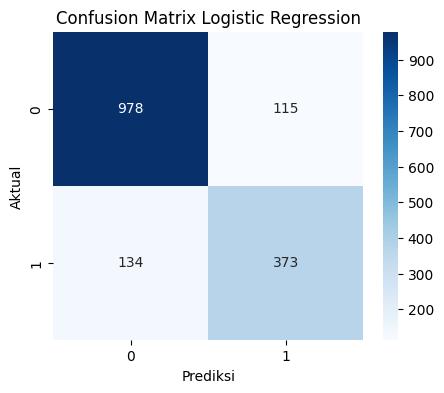

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAkurasi Model Logistic Regression:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()